In [1]:
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow_docs.vis import embed
import numpy as np
import cv2
import pandas as pd
import platform

# Import matplotlib libraries
from matplotlib import pyplot as plt
from matplotlib.collections import LineCollection
import matplotlib.patches as patches

# Some modules to display an animation using imageio.
import imageio
from IPython.display import HTML, display

2024-07-23 12:04:03.166055: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:479] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-23 12:04:03.188781: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:10575] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-23 12:04:03.188815: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1442] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-07-23 12:04:03.200974: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-07-23 12:04:04.002678: W tensorflow/compiler/tf

In [2]:
if platform.system() == "Darwin":
    root_directory = '/Users/lorenzobarbiero/Documents/GitHub/human_pose'
    data_directory = '/Users/lorenzobarbiero/Desktop/Università/VCS/Human Action Recognition'
else:
    root_directory = ''
    data_directory = '../human_pose_local/archive/Human Action Recognition'

print('root directory is ' + root_directory)
print('data directory is ' + data_directory)

root directory is 
data directory is ../human_pose_local/archive/Human Action Recognition


### Load the data

In [3]:
# load the data
def load_pickle(file_name):
    return pd.read_pickle(file_name + '.pkl')

In [4]:
# file_name = 'movenet_thunder_mobilenet_small'
# file_name = 'movenet_lightning_mobilenet_large'
# file_name = 'movenet_thunder_mobilenet_small'
# file_name = 'movenet_lightning_mobilenet_large'

In [5]:
file_name = 'movenet_thunder_mobilenet_large'
df = load_pickle(data_directory + '/' + file_name)

In [6]:
df

,filename,label,category,keypoints,object,obj_label,obj_vector,obj_words
0,Image_1.jpg,sitting,11,"[0.0882076621055603, 0.6247615814208984, 0.756...","[0.60480165, 0.04718776, 0.032203343, 0.022124...","[697, 789, 822, 514, 614]","[[-0.28338998556137085, 0.4774399995803833, 0....","[[pajama], [shoji], [steel, drum], [cowboy, bo..."
1,Image_2.jpg,using_laptop,14,"[0.30178800225257874, 0.9912914037704468, 0.80...","[0.7418762, 0.040941585, 0.012892539, 0.008574...","[831, 416, 669, 697, 681]","[[0.3403800129890442, -0.9357600212097168, 1.1...","[[studio, couch], [balance, beam], [mosquito, ..."
2,Image_3.jpg,hugging,7,"[0.20708897709846497, 0.6019015908241272, 0.42...","[0.1416007, 0.13604547, 0.05453948, 0.04444576...","[697, 522, 984, 529, 416]","[[-0.28338998556137085, 0.4774399995803833, 0....","[[pajama], [croquet, ball], [rapeseed], [diape..."
3,Image_4.jpg,sleeping,12,"[0.37268558144569397, 0.1374012678861618, 0.20...","[0.6505104, 0.06191667, 0.027490702, 0.0246344...","[678, 691, 680, 529, 823]","[[-1.2170699834823608, -0.12339100241661072, -...","[[neck, brace], [oxygen, mask], [nipple], [dia..."
4,Image_5.jpg,using_laptop,14,"[0.03276867792010307, 0.2222181260585785, 0.79...","[0.71057284, 0.10088889, 0.035408325, 0.016313...","[490, 655, 689, 824, 601]","[[-0.1615300178527832, -0.205020010471344, -0....","[[chain, mail], [miniskirt], [overskirt], [sto..."
...,...,...,...,...,...,...,...,...
12595,Image_12596.jpg,sitting,11,"[0.04209192469716072, 0.7099579572677612, 0.58...","[0.23895389, 0.14317973, 0.076097175, 0.056834...","[706, 905, 624, 559, 831]","[[-0.399260014295578, 0.13120000064373016, -0....","[[patio], [window, shade], [library], [folding..."
12596,Image_12597.jpg,clapping,1,"[0.06415694206953049, 0.705790638923645, 0.468...","[0.8603377, 0.021510318, 0.016789775, 0.009536...","[617, 823, 678, 904, 905]","[[0.10435998439788818, 0.29162999987602234, 0....","[[lab, coat], [stethoscope], [neck, brace], [w..."
12597,Image_12598.jpg,sitting,11,"[0.051420778036117554, 0.4904737174510956, 0.5...","[0.48068434, 0.07919033, 0.043129846, 0.026711...","[608, 743, 843, 487, 543]","[[-0.13323000073432922, -0.6275100111961365, -...","[[jean], [prison], [swing], [cellular, telepho..."
12598,Image_12599.jpg,dancing,3,"[0.2283279001712799, 0.42992380261421204, 0.62...","[0.15199172, 0.068358354, 0.059058633, 0.04262...","[416, 615, 747, 617, 587]","[[0.5044400095939636, 0.536300003528595, -0.07...","[[balance, beam], [knee, pad], [punching, bag]..."


In [7]:
# apply the function to the dataframe
df['keypoints'] = df['keypoints'].apply(lambda x: np.array(x).reshape(-1, 3))
df['object'] = df['object'].apply(lambda x: np.array(x).reshape(-1, 1))
df['obj_vector'] = df['obj_vector'].apply(lambda x: np.array(x))
df['category'] = df['category'].apply(lambda x: np.array(x))

In [8]:
# shape of the data
print('keypoints shape: ', df['keypoints'].iloc[0].shape)
print('object shape: ', df['object'].iloc[0].shape)
print('obj_vector shape: ', df['obj_vector'].iloc[0].shape)

keypoints shape:  (17, 3)
object shape:  (5, 1)
obj_vector shape:  (5, 100)


In [9]:
# set to 0 the keypoints with score < 0.3
def filter_keypoints(x):
    x[x[:, 2] < 0.3] = 0
    return x

# df['keypoints'] = df['keypoints'].apply(lambda x: filter_keypoints(x))

# keep only the positions of the keypoints
def get_positions(x):
    return x[:, :2]

df['keypoints'] = df['keypoints'].apply(lambda x: get_positions(x))

# set to 0 the object with score < 0.1
def filter_object(x):
    x[x[:, 0] < 0.1] = 0
    return x

# df['object'] = df['object'].apply(lambda x: filter_object(x))

In [10]:
df['obj_input'] = df.apply(lambda x: np.sum(x['object']*x['obj_vector'], axis=0), axis=1)
df['keypoints'] = df['keypoints'].apply(lambda x: x.flatten())

In [11]:
df

,filename,label,category,keypoints,object,obj_label,obj_vector,obj_words,obj_input
0,Image_1.jpg,sitting,11,"[0.0882076621055603, 0.6247615814208984, 0.002...","[[0.60480165], [0.04718776], [0.032203343], [0...","[697, 789, 822, 514, 614]","[[-0.28338998556137085, 0.4774399995803833, 0....","[[pajama], [shoji], [steel, drum], [cowboy, bo...","[-0.20592125285495, 0.3260203410991888, -0.008..."
1,Image_2.jpg,using_laptop,14,"[0.30178800225257874, 0.9912914037704468, 0.18...","[[0.7418762], [0.040941585], [0.012892539], [0...","[831, 416, 669, 697, 681]","[[0.3403800129890442, -0.9357600212097168, 1.1...","[[studio, couch], [balance, beam], [mosquito, ...","[0.2683790374652541, -0.6670002713657828, 0.87..."
2,Image_3.jpg,hugging,7,"[0.20708897709846497, 0.6019015908241272, 0.14...","[[0.1416007], [0.13604547], [0.05453948], [0.0...","[697, 522, 984, 529, 416]","[[-0.28338998556137085, 0.4774399995803833, 0....","[[pajama], [croquet, ball], [rapeseed], [diape...","[-0.02030288063444885, 0.23200371996866265, 0...."
3,Image_4.jpg,sleeping,12,"[0.37268558144569397, 0.1374012678861618, 0.31...","[[0.6505104], [0.06191667], [0.027490702], [0....","[678, 691, 680, 529, 823]","[[-1.2170699834823608, -0.12339100241661072, -...","[[neck, brace], [oxygen, mask], [nipple], [dia...","[-0.8215984234954313, -0.02994576481942718, -0..."
4,Image_5.jpg,using_laptop,14,"[0.03276867792010307, 0.2222181260585785, 0.01...","[[0.71057284], [0.10088889], [0.035408325], [0...","[490, 655, 689, 824, 601]","[[-0.1615300178527832, -0.205020010471344, -0....","[[chain, mail], [miniskirt], [overskirt], [sto...","[-0.1494515264241883, -0.1284101833971808, -0...."
...,...,...,...,...,...,...,...,...,...
12595,Image_12596.jpg,sitting,11,"[0.04209192469716072, 0.7099579572677612, 0.00...","[[0.23895389], [0.14317973], [0.076097175], [0...","[706, 905, 624, 559, 831]","[[-0.399260014295578, 0.13120000064373016, -0....","[[patio], [window, shade], [library], [folding...","[-0.14739882579379793, 0.2794763101199509, -0...."
12596,Image_12597.jpg,clapping,1,"[0.06415694206953049, 0.705790638923645, 0.000...","[[0.8603377], [0.021510318], [0.016789775], [0...","[617, 823, 678, 904, 905]","[[0.10435998439788818, 0.29162999987602234, 0....","[[lab, coat], [stethoscope], [neck, brace], [w...","[0.057619909586660134, 0.26067134955875726, 0...."
12597,Image_12598.jpg,sitting,11,"[0.051420778036117554, 0.4904737174510956, 0.0...","[[0.48068434], [0.07919033], [0.043129846], [0...","[608, 743, 843, 487, 543]","[[-0.13323000073432922, -0.6275100111961365, -...","[[jean], [prison], [swing], [cellular, telepho...","[-0.001942008389194727, -0.2787240437545768, -..."
12598,Image_12599.jpg,dancing,3,"[0.2283279001712799, 0.42992380261421204, 0.19...","[[0.15199172], [0.068358354], [0.059058633], [...","[416, 615, 747, 617, 587]","[[0.5044400095939636, 0.536300003528595, -0.07...","[[balance, beam], [knee, pad], [punching, bag]...","[0.014005273690095521, 0.06621338508228547, -0..."


### Training-Validation split

In [12]:
def train_test_split(df, train_perc, seed):
    
    shuffled_df = df.sample(frac=1, random_state=seed).reset_index(drop=True)
    
    tr_samples = int(len(df)*train_perc)
    
    train_df = shuffled_df.iloc[:tr_samples]
    
    test_df = shuffled_df.iloc[tr_samples:]
    
    return [train_df,test_df]

In [13]:
def create_dataset(df, batch_size , shuffle=False, use_object=False, dataset_repeat=True):
    
    labels = df['category']
    
    kpoints = df['keypoints']

    # merge the two arrays
    if use_object:
        df['input'] = df.apply(lambda x: np.concatenate((x['keypoints'], x['obj_input'])), axis=1)
    else:
        df['input'] = df['keypoints']

    
    data = np.zeros((len(kpoints), df['input'].iloc[0].shape[0]))
    
    for i, row in enumerate(df['input']): 
        data[i,:] = np.array(row)
        
    dataset = tf.data.Dataset.from_tensor_slices((data, labels))
    
    if shuffle:
        dataset = dataset.shuffle(len(data))

    if dataset_repeat:        
        dataset = dataset.repeat()
    
    dataset = dataset.batch(batch_size = batch_size)
    
    return dataset

In [14]:
train_perc = 0.75
train, val = train_test_split(df = df, train_perc = train_perc, seed = 42)

In [15]:
batch_s = 32
use_object = True

dataset_train = create_dataset(train, batch_s, shuffle=False, use_object=use_object)
train_steps = int(np.ceil(len(train)/batch_s))

dataset_val = create_dataset(val, batch_s, shuffle=False, use_object=use_object)
val_steps = int(np.ceil(len(val)/batch_s))

### Define the model

In [16]:
input_shape = train['input'].iloc[0].shape
print('input shape is ' + str(input_shape))

input shape is (134,)


In [17]:
model = tf.keras.Sequential([
        tf.keras.Input(shape=input_shape),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dropout(0.3),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dense(15, activation='softmax')
    ])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │        17,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 15)             │           495 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 33,327 (130.18 KB)

 Trainable params: 33,327 (130.18 KB)

 Non-trainable params: 0 (0.00 B)

In [18]:
early_stop_callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=20)

results = model.fit(dataset_train,
                     epochs=1000,
                       steps_per_epoch=train_steps, 
                       validation_data=dataset_val, 
                       validation_steps=val_steps,
                        callbacks=[early_stop_callback])

Epoch 1/1000
296/296 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.2096 - loss: 2.4047 - val_accuracy: 0.4148 - val_loss: 1.8074
Epoch 2/1000
296/296 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4208 - loss: 1.7825 - val_accuracy: 0.4495 - val_loss: 1.7004
Epoch 3/1000
296/296 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4597 - loss: 1.6651 - val_accuracy: 0.4672 - val_loss: 1.6708
Epoch 4/1000
296/296 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4794 - loss: 1.6097 - val_accuracy: 0.4833 - val_loss: 1.6079
Epoch 5/1000
296/296 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4954 - loss: 1.5501 - val_accuracy: 0.4855 - val_loss: 1.6169
Epoch 6/1000
296/296 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5026 - loss: 1.5324 - val_accuracy: 0.4937 - val_loss: 1.5749
Epoch 7/1000
296/296 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5063 - loss: 1.4985 - val_accuracy: 0.5013 - val_loss: 1.5642
Epoch 8/1000
296/296 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5191 - loss: 1.4697 - 

In [27]:
# save the model
save_model = False
if save_model:
    model.save(root_directory + 'models/' + file_name + '.keras')

### Analyze the results

In [26]:
train_loss = results.history['loss']

val_loss = results.history['val_loss']

train_accuracy = results.history['accuracy']

val_accuracy = results.history['val_accuracy']

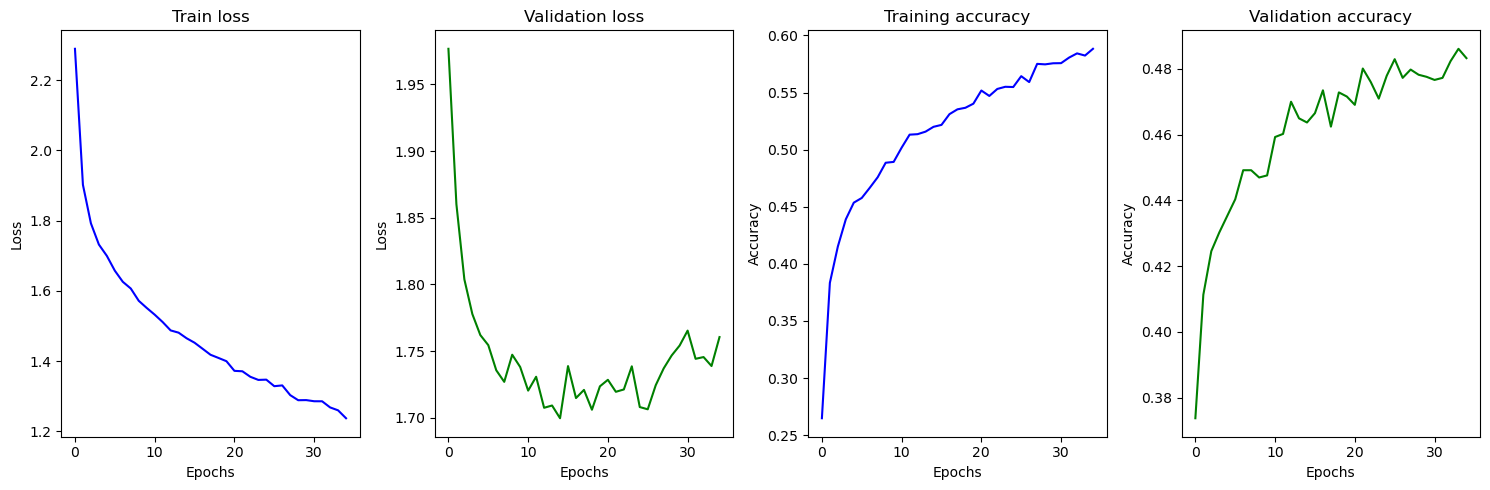

In [27]:
t = np.arange(len(train_accuracy))
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(15, 5))

ax1.plot(t, train_loss, 'b')
ax1.set_title('Train loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')

ax2.plot(t, val_loss, 'g')
ax2.set_title('Validation loss')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Loss')

ax3.plot(t, train_accuracy, 'b')
ax3.set_title('Training accuracy')
ax3.set_xlabel('Epochs')
ax3.set_ylabel('Accuracy')

ax4.plot(t, val_accuracy, 'g')
ax4.set_title('Validation accuracy')
ax4.set_xlabel('Epochs')
ax4.set_ylabel('Accuracy')

# Adjust layout for better spacing
plt.tight_layout()

# Display the plot
plt.show()

### Results on the Validation set

In [28]:
# get the label from the category
labels = df.groupby('category').first()['label']
labels = np.array(labels).tolist()
labels[9] = 'music'

In [29]:
# predict on the validation set
dataset_val = create_dataset(val, batch_s, shuffle=False, use_object=use_object, dataset_repeat=False)

y_pred = model.predict(dataset_val)
pred = np.argmax(y_pred, axis=1)

# confusion matrix
from sklearn.metrics import confusion_matrix

y_true = val['category']

conf_matrix = confusion_matrix(y_true, pred)

99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


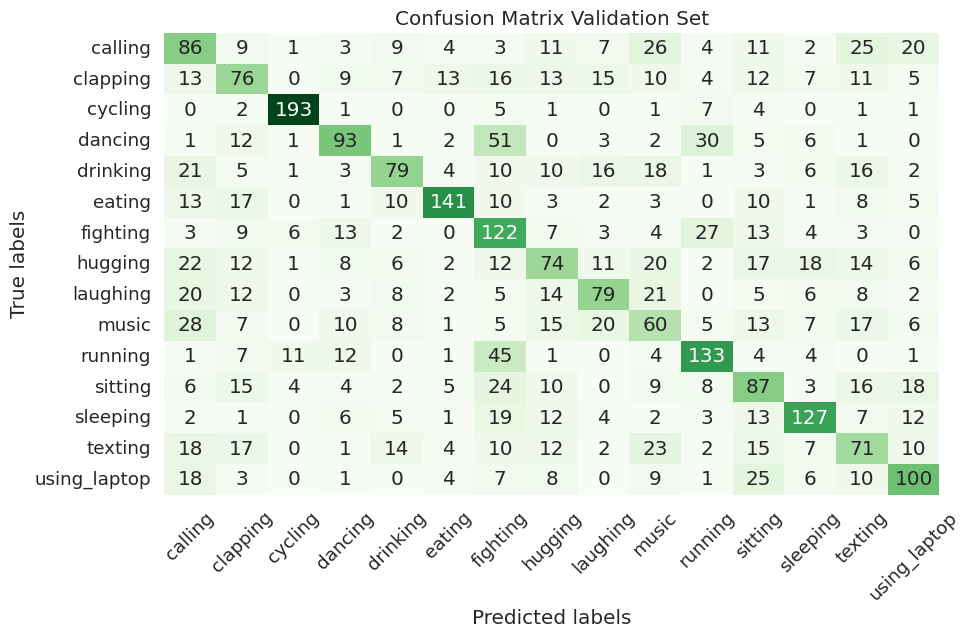

In [30]:
import seaborn as sns

plt.figure(figsize=(10, 6))

sns.set(font_scale=1.2)  # Adjust font size

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="Greens", cbar=False,
            xticklabels=labels, yticklabels=labels)

plt.xticks(rotation=45)

plt.xlabel('Predicted labels')

plt.ylabel('True labels')

plt.title('Confusion Matrix Validation Set')

plt.show()

In [22]:
def class_specific_metrics(cm, class_labels = [i for i in range(15)]):
    # Compute the confusion matrix

    # Initialize dictionaries to hold metrics for each class
    accuracy = {}
    sensitivity = {}
    specificity = {}
    precision = {}

    for idx, label in enumerate(class_labels):
        # True positives
        TP = cm[idx, idx]

        # False positives
        FP = cm[:, idx].sum() - TP

        # False negatives
        FN = cm[idx, :].sum() - TP

        # True negatives
        TN = cm.sum() - (TP + FP + FN)

        # Calculate metrics
        accuracy[label] = (TP + TN) / cm.sum()
        sensitivity[label] = TP / (TP + FN) if (TP + FN) != 0 else 0
        specificity[label] = TN / (TN + FP) if (TN + FP) != 0 else 0
        precision[label] = TP / (TP + FP) if (TP + FP) != 0 else 0

    metrics_dict = {label: {'Accuracy': accuracy[label],
                        'Sensitivity': sensitivity[label],
                        'Specificity': specificity[label],
                        'Precision': precision[label]}
                    for label in class_labels}

    # Convert the dictionary to a pandas DataFrame
    df_metrics = pd.DataFrame.from_dict(metrics_dict, orient='index')
    df_metrics

    return df_metrics

In [23]:
val_metrics = class_specific_metrics(conf_matrix)
val_metrics

,Accuracy,Sensitivity,Specificity,Precision
0,0.908571,0.447964,0.943325,0.373585
1,0.934921,0.502370,0.965975,0.514563
2,0.982857,0.870370,0.991138,0.878505
3,0.940635,0.576923,0.966349,0.547945
4,0.936825,0.353846,0.975296,0.485915
5,0.962857,0.687500,0.983937,0.766169
6,0.926032,0.578704,0.951602,0.468165
7,0.928889,0.364444,0.972308,0.503067
8,0.939683,0.540541,0.964587,0.487805
9,0.911111,0.277228,0.954545,0.294737


### Prediction on the training set


In [24]:
# predict on the training set
dataset_train = create_dataset(train, batch_s, shuffle=False, use_object=use_object, dataset_repeat=False)
y_pred_train = model.predict(dataset_train, steps=train_steps)

pred_train = np.argmax(y_pred_train, axis=1)

# confusion matrix
y_true_train = train['category']

conf_matrix_train = confusion_matrix(y_true_train, pred_train)

296/296 ━━━━━━━━━━━━━━━━━━━━ 0s 906us/step


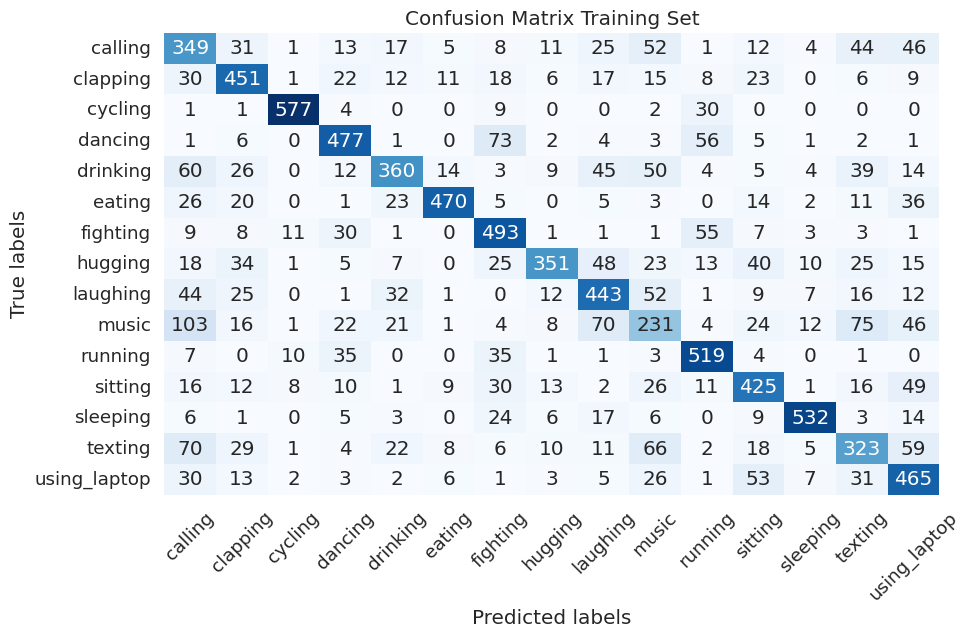

In [25]:
import seaborn as sns

plt.figure(figsize=(10, 6))

sns.set(font_scale=1.2)  # Adjust font size

sns.heatmap(conf_matrix_train, annot=True, fmt='d', cmap="Blues", cbar=False,
            xticklabels=labels, yticklabels=labels)

plt.xticks(rotation=45)

plt.xlabel('Predicted labels')

plt.ylabel('True labels')

plt.title('Confusion Matrix Training Set')

plt.show()

In [26]:
train_metrics = class_specific_metrics(conf_matrix_train)
train_metrics

,Accuracy,Sensitivity,Specificity,Precision
0,0.926878,0.563813,0.952327,0.453247
1,0.957672,0.717011,0.974833,0.670134
2,0.991217,0.924679,0.995921,0.941272
3,0.965926,0.754747,0.981061,0.740683
4,0.954815,0.558140,0.983873,0.717131
5,0.978730,0.762987,0.993774,0.895238
6,0.960635,0.790064,0.972694,0.671662
7,0.963386,0.570732,0.990719,0.810624
8,0.951005,0.676336,0.971461,0.638329
9,0.922222,0.362069,0.962778,0.413238
